# Exploring ELASTICC2 Data On NERSC

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
from matplotlib import pyplot as plt
%matplotlib inline

Rob Knop has stored some aggregated database information from ELASTICC2 in the following folder:

In [2]:
elasticc_2_summary_folder = '/global/cfs/cdirs/desc-td/SOFTWARE/tom_deployment/production/tom_desc/tom_desc/elasticc2/summary_data/confusionvst'

There are a series of files in there where the first number is the broker classifier that ran and the second number is the true class from the ELASTICC2 classification list.

**Warning**: The `cifydf` files used in this notebook can be very large (on the order of GB).

In [3]:
full_prob_df = pd.read_pickle(os.path.join(elasticc_2_summary_folder, '13_2222_cifydf.pkl'))

The `cifydf` files are organized with a list of source with a given true class with the day of their detection relative to peak (each source only corresponds to a single day since they are sources and not objects) and the probability assigned by the classifier to each of the possible classifications.

In [4]:
full_prob_df

relday m.probability
s.diasource_id m.classid                      
100006500047   2332          -18       0.00421
               2245          -18      0.005696
               2322          -18           0.0
               2324          -18      0.000001
               2234          -18      0.000002
...                          ...           ...
15951127400013 2241           18           0.0
               2310           18           0.0
               2321           18           0.0
               2326           18           0.0
               2331           18           0.0

[234037056 rows x 2 columns]

In [5]:
full_prob_df.index.names = ['source_id', 'class_id']

In [6]:
day_prob_class_truth = np.array(full_prob_df.query(f'relday == -18 and class_id == 2222')['m.probability'].values, dtype=float)

In [7]:
day_prob_class_confusion = np.array(full_prob_df.query(f'relday == -18 and class_id == 2242')['m.probability'].values, dtype=float)

For the given true class for this file and a confusion class we query all objects on a specific day and store the list of the probabilities for all sources on that day. We can then build violin plots for each day.

Text(0, 0.5, 'Probability')

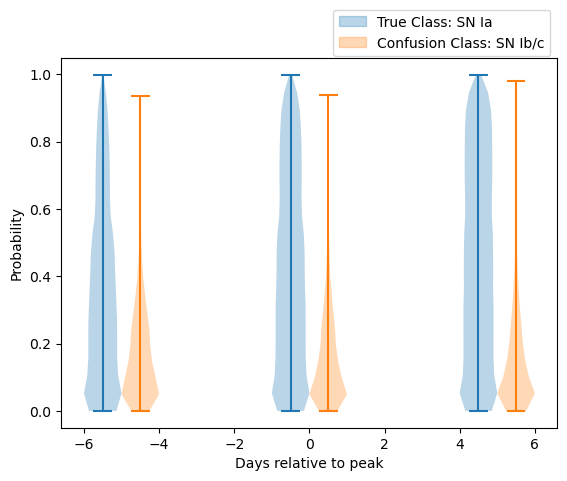

In [8]:
import matplotlib.patches as mpatches

rel_days = np.array([-5, 0, 5])
day_prob_class_truth = []
day_prob_class_confusion = []
true_class = 2222
confusion_class = 2223

for rel_day in rel_days:
    day_prob_class_truth.append(np.array(full_prob_df.query(f'relday == {rel_day} and class_id == {true_class}')['m.probability'].values, dtype=float))
    day_prob_class_confusion.append(np.array(full_prob_df.query(f'relday == {rel_day} and class_id == {confusion_class}')['m.probability'].values, dtype=float))

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

add_label(plt.violinplot(day_prob_class_truth, points=20, positions=rel_days - .5, widths=1.0), 'True Class: SN Ia')
add_label(plt.violinplot(day_prob_class_confusion, points=20, positions=rel_days + .5, widths=1.0), label='Confusion Class: SN Ib/c')

plt.legend(*zip(*labels), bbox_to_anchor=(1., 1.15))
plt.xlabel('Days relative to peak')
plt.ylabel('Probability')

Some single day plots.

In [9]:
day_prob_class_truth = np.array(full_prob_df.query(f'relday == 0 and class_id == 2222')['m.probability'].values, dtype=float)

In [10]:
day_prob_class_confusion = np.array(full_prob_df.query(f'relday == 0 and class_id == 2232')['m.probability'].values, dtype=float)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fc6ab1dd030>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fc6ab3b6500>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fc6ab1dd7b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fc6ab1ddb70>}

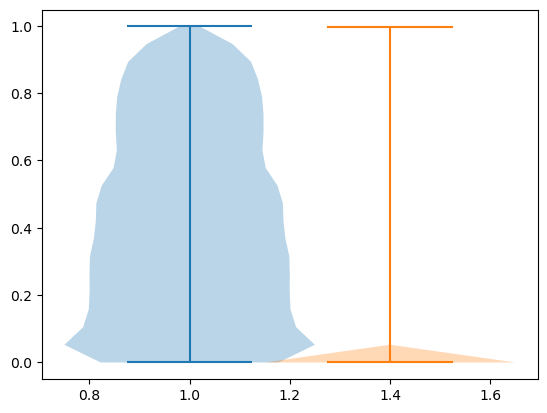

In [11]:
plt.violinplot(day_prob_class_truth, points=20)
plt.violinplot(day_prob_class_confusion, points=20, positions=[1.4])

In [12]:
day_prob_class_truth = np.array(full_prob_df.query(f'relday == 18 and class_id == 2222')['m.probability'].values, dtype=float)

In [13]:
day_prob_class_confusion = np.array(full_prob_df.query(f'relday == 18 and class_id == 2232')['m.probability'].values, dtype=float)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fc6ab246bf0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fcb1f5223e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fc6ab247370>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fc6ab247730>}

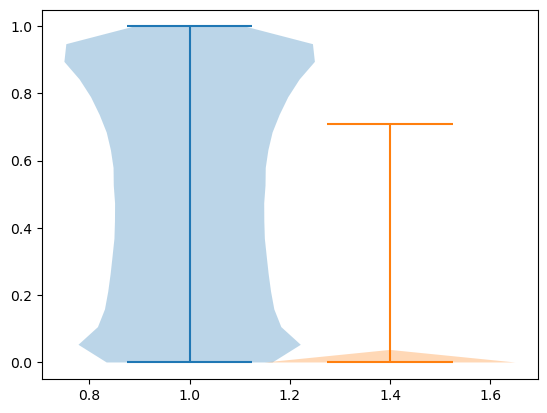

In [14]:
plt.violinplot(day_prob_class_truth, points=20)
plt.violinplot(day_prob_class_confusion, points=20, positions=[1.4])

In [15]:
np.histogram(full_prob_df.query(f'relday == -18 and class_id == 2222')['m.probability'].values, bins=np.linspace(0, 1, 21))

(array([11616,  5514,  4322,  3787,  3494,  3233,  2693,  2224,  1728,
         1361,   951,   308,    89,    75,    41,    51,    39,    16,
            4,     3]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))